In [1]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

In [2]:
from google.cloud import bigquery

# Create client object
client = bigquery.Client()

# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')

# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [3]:
# Create table reference
table_ref_20160801 = dataset_ref.table('ga_sessions_20160801')

# Retrieve table from reference
table_20160801 = client.get_table(table_ref_20160801)

# View columns
client.list_rows(table_20160801, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,NaN,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,NaN,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,NaN,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,NaN,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,NaN,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [4]:
def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table_20160801.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table_20160801.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table_20160801.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table_20160801.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table_20160801.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table_20160801.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [10]:
query = """

SELECT 
    CAST(fullVisitorId AS STRING) AS fullVisitorId,              -- Unique visitor ID
    visitNumber,                                                 -- The session number for this user
    visitId,                                                     -- Unique session ID
    TIMESTAMP_SECONDS(visitStartTime) AS session_start_time,     -- Start time of the session in timestamp format
    TIMESTAMP_SECONDS(visitStartTime + totals.timeOnSite) AS session_end_time, -- End time of the session
    PARSE_DATE('%Y%m%d', date) AS session_date,                  -- Date of the session in YYYYMMDD format
    hits.page.pagePath AS page_path,                             -- Path of the page visited
    hits.eventInfo.eventCategory AS event_category,              -- Category of the event
    hits.eventInfo.eventAction AS event_action,                  -- Action of the event
    hits.eventInfo.eventLabel AS event_label,                    -- Label of the event
    product.productSKU AS product_sku,                      -- Product SKU associated with the event
    product.v2ProductName AS product_name,                  -- Product name associated with the event
    product.productPrice AS product_price,                  -- Price of the product associated with the event
    hits.eCommerceAction.action_type AS action_type,             -- Type of ecommerce action (e.g., click, add to cart)
    totals.transactions AS total_transactions,                   -- Total number of transactions in the session
    totals.totalTransactionRevenue AS total_transaction_revenue, -- Total revenue from transactions in the session
    trafficSource.source AS traffic_source,                      -- Source of the traffic (e.g., google, direct, referral)
    trafficSource.medium AS traffic_medium,                      -- Medium of the traffic (e.g., organic, CPC, referral)
    trafficSource.campaign AS traffic_campaign,                  -- Campaign name if the user arrived via a campaign
    device.deviceCategory AS device_category,                    -- The category of the device (e.g., desktop, mobile)
    geoNetwork.country AS user_country,                          -- Country from which the user accessed the site
    hits.type AS hits_type                                       -- Type of hit (e.g., PAGE, EVENT)
FROM 
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`,             -- Replace with your project and dataset IDs
    UNNEST(hits) AS hits,                                        -- Unnest the hits array
    UNNEST(hits.product) AS product                              -- Unnest the products array within hits
WHERE 
    _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'            -- Replace with your desired date range
    AND hits.eCommerceAction.action_type IS NOT NULL
    AND hits.eCommerceAction.action_type !='0'
                                                            -- Include only hits with ecommerce actions                          
    """

df_raw = client.query(query).result().to_dataframe()
df_raw.head(10)


,fullVisitorId,visitNumber,visitId,session_start_time,session_end_time,session_date,page_path,event_category,event_action,event_label,...,product_price,action_type,total_transactions,total_transaction_revenue,traffic_source,traffic_medium,traffic_campaign,device_category,user_country,hits_type
0,0630286326078264499,1,1495302575,2017-05-20 17:49:35+00:00,2017-05-20 17:50:05+00:00,2017-05-20,/yourinfo.html,None,None,None,...,6990000,5,NaN,NaN,(direct),(none),(not set),desktop,France,PAGE
1,3592312530193919697,1,1495309254,2017-05-20 19:40:54+00:00,2017-05-20 19:41:23+00:00,2017-05-20,/google+redesign/electronics/audio,Enhanced Ecommerce,Quickview Click,Google Bluetooth Speaker-Power Bank,...,76990000,1,NaN,NaN,(direct),(none),(not set),mobile,South Africa,EVENT
2,6535107411796579603,1,1495298118,2017-05-20 16:35:18+00:00,2017-05-20 16:35:34+00:00,2017-05-20,/google+redesign/electronics,Enhanced Ecommerce,Quickview Click,Google Power Bank,...,55990000,1,NaN,NaN,(direct),(none),(not set),mobile,Belgium,EVENT
3,6535107411796579603,1,1495298118,2017-05-20 16:35:18+00:00,2017-05-20 16:35:34+00:00,2017-05-20,/google+redesign/electronics/quickview,None,None,None,...,55990000,2,NaN,NaN,(direct),(none),(not set),mobile,Belgium,PAGE
4,7678196951233738389,2,1495282878,2017-05-20 12:21:18+00:00,2017-05-20 12:21:23+00:00,2017-05-20,/google+redesign/apparel/mens/mens+t+shirts,Enhanced Ecommerce,Quickview Click,Google Men's Vintage Badge Tee White,...,18990000,1,NaN,NaN,google,organic,(not set),desktop,India,EVENT
5,6513745411603286014,1,1495325680,2017-05-21 00:14:40+00:00,2017-05-21 00:15:21+00:00,2017-05-20,/google+redesign/accessories/fun,Enhanced Ecommerce,Quickview Click,Windup Android,...,3990000,1,NaN,NaN,google,organic,(not set),tablet,Germany,EVENT
6,9793307015318228794,1,1495301390,2017-05-20 17:29:50+00:00,2017-05-20 17:31:22+00:00,2017-05-20,/google+redesign/apparel/womens/womens+t+shirt...,None,None,None,...,18990000,2,NaN,NaN,yahoo,organic,(not set),desktop,United States,PAGE
7,5212123617655264038,1,1495284069,2017-05-20 12:41:09+00:00,2017-05-20 12:42:10+00:00,2017-05-20,/google+redesign/bags,Enhanced Ecommerce,Product Click,None,...,99990000,1,NaN,NaN,(direct),(none),(not set),mobile,United States,EVENT
8,2048784835191034469,1,1495302244,2017-05-20 17:44:04+00:00,2017-05-20 17:44:14+00:00,2017-05-20,/google+redesign/shop+by+brand,Enhanced Ecommerce,Quickview Click,Android Lunch Kit,...,17990000,1,NaN,NaN,(direct),(none),(not set),mobile,Portugal,EVENT
9,2048784835191034469,1,1495302244,2017-05-20 17:44:04+00:00,2017-05-20 17:44:14+00:00,2017-05-20,/google+redesign/shop+by+brand/quickview,None,None,None,...,17990000,2,NaN,NaN,(direct),(none),(not set),mobile,Portugal,PAGE


In [46]:
df = df_raw.copy()

In [47]:
# Create a unique identifier by combining fullVisitorId and visitId
df['unique_id'] = df['fullVisitorId'].astype(str) + "_" + df['visitId'].astype(str)


In [13]:


def count_distinct_values(df):
    """
    Count distinct values in each categorical column of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    
    Returns:
    pd.DataFrame: A DataFrame showing the distinct count of values for each categorical column.
    """
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Create a dictionary to store the distinct counts
    distinct_counts = {col: df[col].nunique() for col in categorical_columns}
    
    # Convert the dictionary to a DataFrame for better visualization
    distinct_counts_df = pd.DataFrame(list(distinct_counts.items()), columns=['Column', 'Distinct_Count'])
    
    return distinct_counts_df

distinct_values_df = count_distinct_values(df)
print(distinct_values_df)


              Column  Distinct_Count
0      fullVisitorId          105139
1       session_date             366
2          page_path             788
3     event_category               2
4       event_action               5
5        event_label             492
6        product_sku            1399
7       product_name             533
8        action_type               6
9     traffic_source             141
10    traffic_medium               7
11  traffic_campaign               6
12   device_category               3
13      user_country             186
14         hits_type               2
15         unique_id          133146


In [14]:


def print_top_categories(df, top_n=3):
    """
    Automatically identify categorical columns and print the top N categories 
    in each categorical variable based on their occurrence.

    Parameters:
    - df: DataFrame containing the data
    - top_n: Number of top categories to print (default is 3)
    """
    # Automatically identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    for column in categorical_columns:
        print(f"\nTop {top_n} categories in '{column}':")
        top_categories = df[column].value_counts().head(top_n)
        print(top_categories)

print_top_categories(df)



Top 3 categories in 'fullVisitorId':
fullVisitorId
1957458976293878100    3288
4636052301667930460    2742
8942866004645538967    2248
Name: count, dtype: int64

Top 3 categories in 'session_date':
session_date
2016-08-25    9101
2016-08-12    9017
2017-03-20    8066
Name: count, dtype: int64

Top 3 categories in 'page_path':
page_path
/payment.html           98244
/yourinfo.html          93587
/ordercompleted.html    74457
Name: count, dtype: int64

Top 3 categories in 'event_category':
event_category
Enhanced Ecommerce    583970
Contact Us               203
Name: count, dtype: int64

Top 3 categories in 'event_action':
event_action
Quickview Click    359494
Add to Cart        121337
Product Click       86198
Name: count, dtype: int64

Top 3 categories in 'event_label':
event_label
Google Men's 100% Cotton Short Sleeve Hero Tee White    12520
Google Alpine Style Backpack                             7959
Waterproof Backpack                                      7720
Name: count, dtype:

In [15]:
def fillna_numerical_with_zero(df):
    """
    Fill NaN values with 0 in all numerical columns of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: The DataFrame with NaN values filled with 0 in numerical columns.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # Fill NaN values with 0 in numerical columns
    df[numerical_cols] = df[numerical_cols].fillna(0)
    
    return df


df = fillna_numerical_with_zero(df)

In [16]:
def five_number_summary(df):
    """
    Provide a five-number summary (minimum, 25th percentile, median, 75th percentile, maximum)
    for each numerical column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: A DataFrame containing the five-number summary for each numerical column.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # Calculate five-number summary
    summary = {}
    for col in numerical_cols:
        summary[col] = {
            'Min': df[col].min(),
            '25th Percentile': df[col].quantile(0.25),
            'Median': df[col].median(),
            '75th Percentile': df[col].quantile(0.75),
            'Max': df[col].max()
        }
    
    return pd.DataFrame(summary).T

summary_df = five_number_summary(df)
print(summary_df)


                                    Min  25th Percentile        Median  \
visitNumber                1.000000e+00     1.000000e+00  1.000000e+00   
visitId                    1.470035e+09     1.475352e+09  1.483245e+09   
product_price              0.000000e+00     7.990000e+06  1.699000e+07   
total_transactions         0.000000e+00     0.000000e+00  0.000000e+00   
total_transaction_revenue  0.000000e+00     0.000000e+00  0.000000e+00   

                           75th Percentile           Max  
visitNumber                   3.000000e+00  3.940000e+02  
visitId                       1.493048e+09  1.501657e+09  
product_price                 3.980000e+07  9.995000e+08  
total_transactions            1.000000e+00  2.500000e+01  
total_transaction_revenue     3.548000e+07  4.708206e+10  


In [44]:
# df = df_raw.copy()

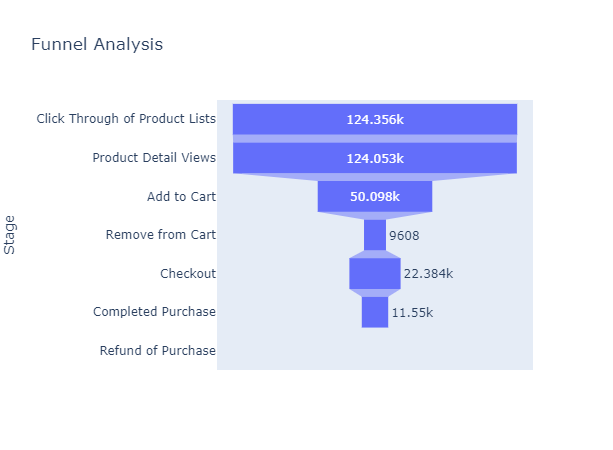

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Define funnel stages based on action_type
funnel_stages = {
    '1': 'Click Through of Product Lists',
    '2': 'Product Detail Views',
    '3': 'Add to Cart',
    '4': 'Remove from Cart',
    '5': 'Checkout',
    '6': 'Completed Purchase',
    '7': 'Refund of Purchase'
}

# Map action_type to funnel stages
df['funnel_stage'] = df['action_type'].map(funnel_stages)

# Aggregate unique users at each funnel stage
stage_counts = df.groupby('funnel_stage')['unique_id'].nunique().reindex(funnel_stages.values())

# Calculate percentage drop between stages
funnel_percentages = stage_counts / stage_counts.max() * 100

# Funnel chart using Plotly
funnel_data = pd.DataFrame({
    'Stage': stage_counts.index,
    'Users': stage_counts.values,
    'Percentage': funnel_percentages.values
})

fig = px.funnel(funnel_data, x='Users', y='Stage', title='Funnel Analysis')
fig.show()

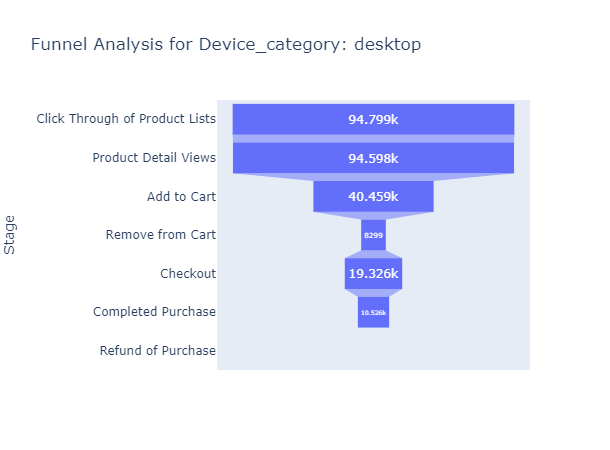

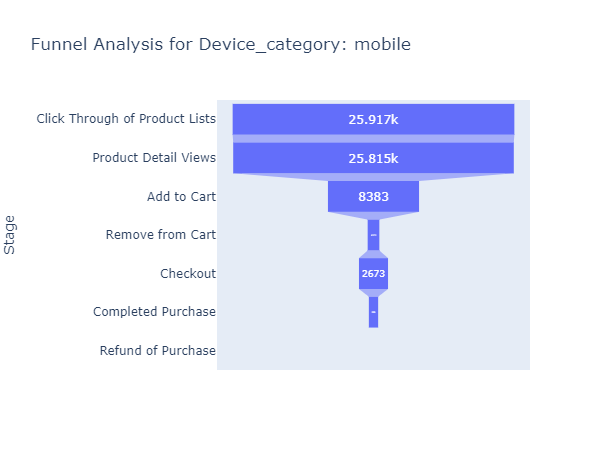

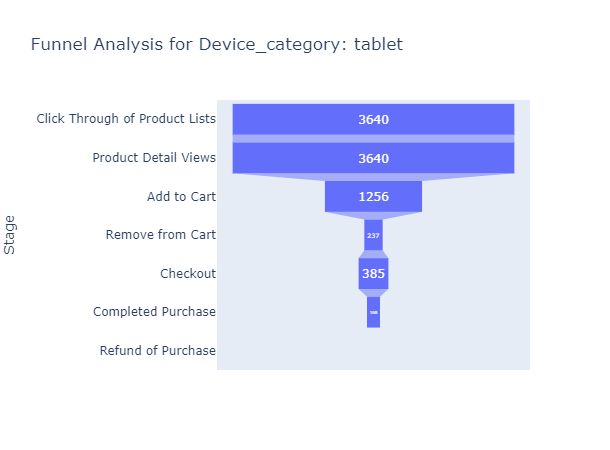

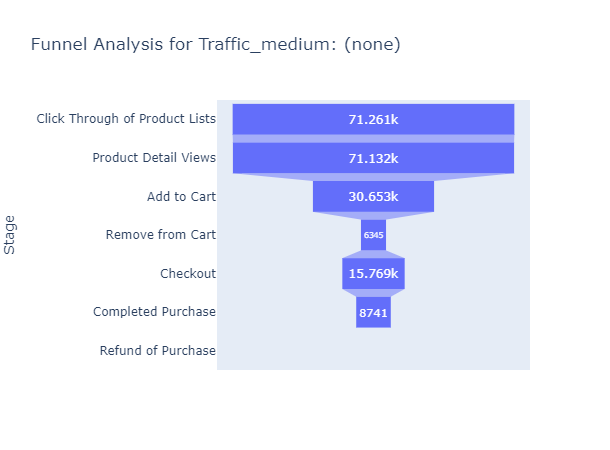

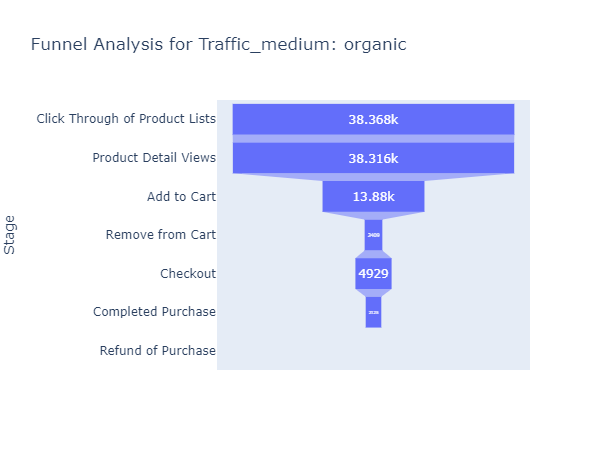

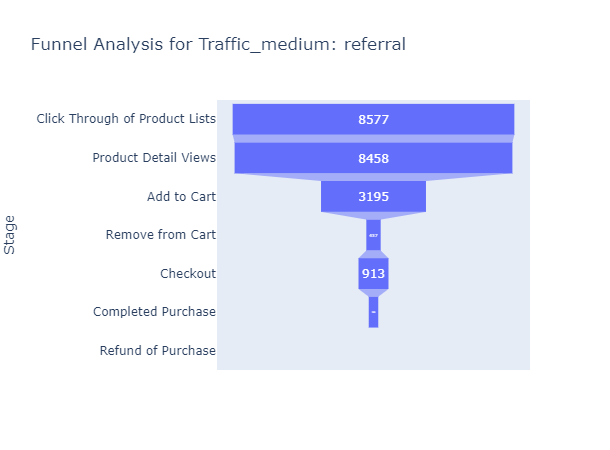

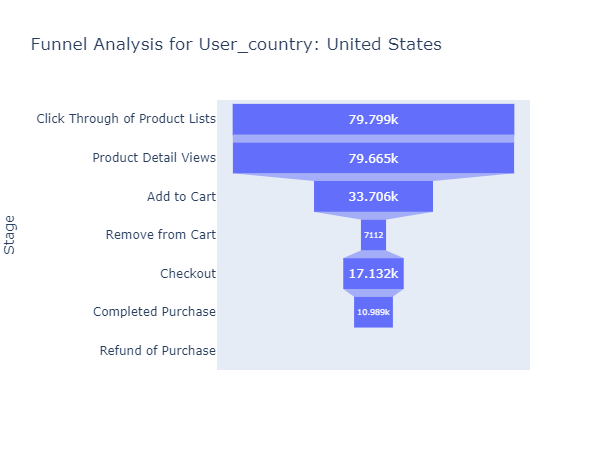

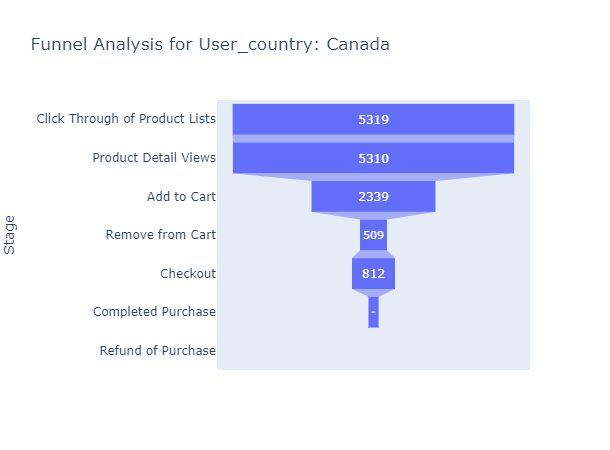

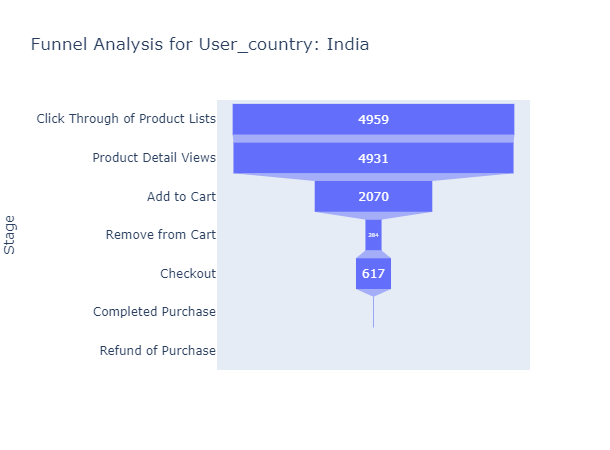

In [36]:
import pandas as pd
import plotly.graph_objects as go

# Function to get top 3 categories based on transaction counts
def get_top_categories(df, dimension):
    return df.groupby(dimension)['unique_id'].nunique().nlargest(3).index

# Function to visualize funnel by a specific dimension with top 3 categories sequentially
def visualize_top_funnel_by_dimension_sequential(df, dimension):
    top_categories = get_top_categories(df, dimension)
    
    for cat in top_categories:
        stage_counts = df[df[dimension] == cat].groupby('funnel_stage')['unique_id'].nunique().reindex(funnel_stages.values())
        funnel_data = pd.DataFrame({
            'Stage': stage_counts.index,
            'Users': stage_counts.values
        })
        
        fig = go.Figure()
        
        fig.add_trace(
            go.Funnel(
                y=funnel_data['Stage'],
                x=funnel_data['Users'],
                textposition='inside',
                name=cat
            )
        )
        
        fig.update_layout(
            title_text=f'Funnel Analysis for {dimension.capitalize()}: {cat}',
            xaxis_title='Users',
            yaxis_title='Stage'
        )
        
        fig.show()

# Analyze the funnel by device category
visualize_top_funnel_by_dimension_sequential(df, 'device_category')

# Analyze the funnel by traffic source medium
visualize_top_funnel_by_dimension_sequential(df, 'traffic_medium')

# Analyze the funnel by country
visualize_top_funnel_by_dimension_sequential(df, 'user_country')


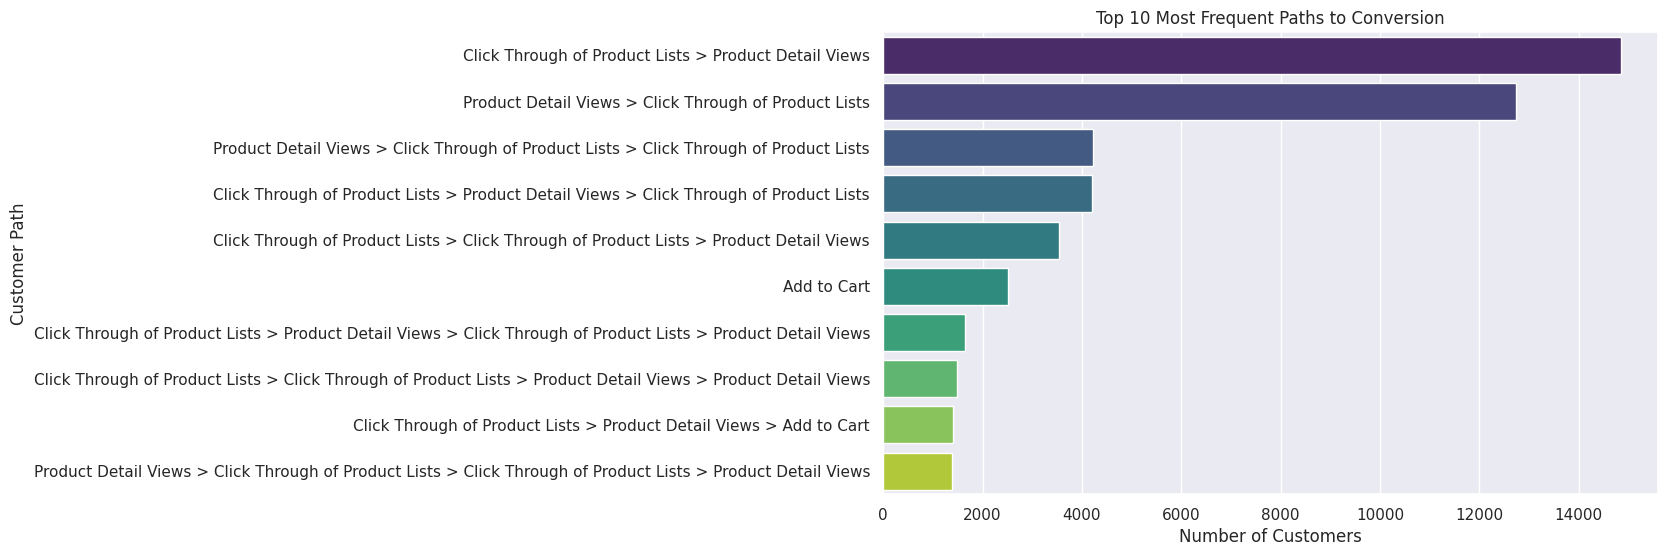

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

# Group by visitor/session to create paths
df_paths = df.groupby(['fullVisitorId', 'visitId'])['funnel_stage'].apply(lambda x: ' > '.join(x)).reset_index()

# Step 2: Count the frequency of each path
path_counts = Counter(df_paths['funnel_stage'])
most_common_paths = path_counts.most_common(10)  # Get the top 10 most common paths

# Convert to DataFrame for visualization
df_common_paths = pd.DataFrame(most_common_paths, columns=['Path', 'Count'])

# Step 3: Visualize the most common paths
plt.figure(figsize=(10, 6))
sns.barplot(y='Path', x='Count', data=df_common_paths, palette='viridis')
plt.title('Top 10 Most Frequent Paths to Conversion')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Path')
plt.show()


Most Sold Product Name: ['Waterproof Backpack' 'Deluge Waterproof Backpack']


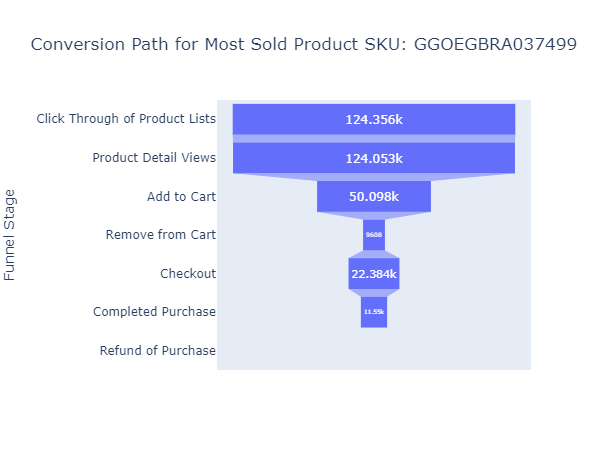

In [51]:
# Convert 'total_transaction_revenue' to numeric if it's not already
df['total_transaction_revenue'] = pd.to_numeric(df['total_transaction_revenue'], errors='coerce')

# Group by product SKU and sum the total transaction revenue to find the most sold product
most_sold_product = df.groupby('product_sku')['total_transaction_revenue'].sum().idxmax()

# Filter the DataFrame for the most sold product
product_df = df[df['product_sku'] == most_sold_product]

print(f"Most Sold Product Name: {product_df['product_name'].unique()}")


# Sort by session start time and visit ID to ensure the correct sequence of events
product_df = product_df.sort_values(by=['fullVisitorId', 'visitId', 'session_start_time'])

# Extract the relevant columns for conversion path analysis
conversion_path_df = product_df[['fullVisitorId', 'visitId', 'session_start_time', 'action_type', 'page_path']]

# Count occurrences of each funnel stage
stage_counts = df.groupby('funnel_stage')['unique_id'].nunique().reindex(funnel_stages.values())

# Create a DataFrame for funnel visualization
funnel_data = pd.DataFrame({
    'Stage': stage_counts.index,
    'Users': stage_counts.values
})

# Create funnel chart
fig = go.Figure()

fig.add_trace(
    go.Funnel(
        y=funnel_data['Stage'],
        x=funnel_data['Users'],
        textposition='inside',
        name='Conversion Path'
    )
)

fig.update_layout(
    title_text=f'Conversion Path for Most Sold Product SKU: {most_sold_product}',
    xaxis_title='Number of Users',
    yaxis_title='Funnel Stage'
)

fig.show()
